# 가설검정의 가정

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *
from pandas import melt

### [3] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/store.xlsx")
df = melt(origin, var_name="store", value_name="sales")
my_pretty_table(df.head())

데이터프레임 크기: 행 수: 100, 열 수: 2

데이터프레임 상위 5개 행
+----+----------+----------+
|    |   store1 |   store2 |
|----+----------+----------|
|  0 |       34 |       63 |
|  1 |       63 |       85 |
|  2 |       57 |       75 |
|  3 |       50 |       48 |
|  4 |       37 |       58 |
+----+----------+----------+

데이터프레임 하위 5개 행
+----+----------+----------+
|    |   store1 |   store2 |
|----+----------+----------|
| 95 |       53 |       69 |
| 96 |       52 |       51 |
| 97 |       52 |       65 |
| 98 |       49 |       59 |
| 99 |       44 |       71 |
+----+----------+----------+

결측치 개수
+----+----------+----------+
|    |   store1 |   store2 |
|----+----------+----------|
|  0 |        0 |        0 |
+----+----------+----------+

기술통계
+--------+---------+--------+---------+-------+-------+-------+-------+-------+-------+
|        |   count |   mean |     std |   min |   25% |   50% |   75% |   max |   nan |
|--------+---------+--------+---------+-------+-------+-------+-------+-------+----

## #02. 데이터 분포 확인

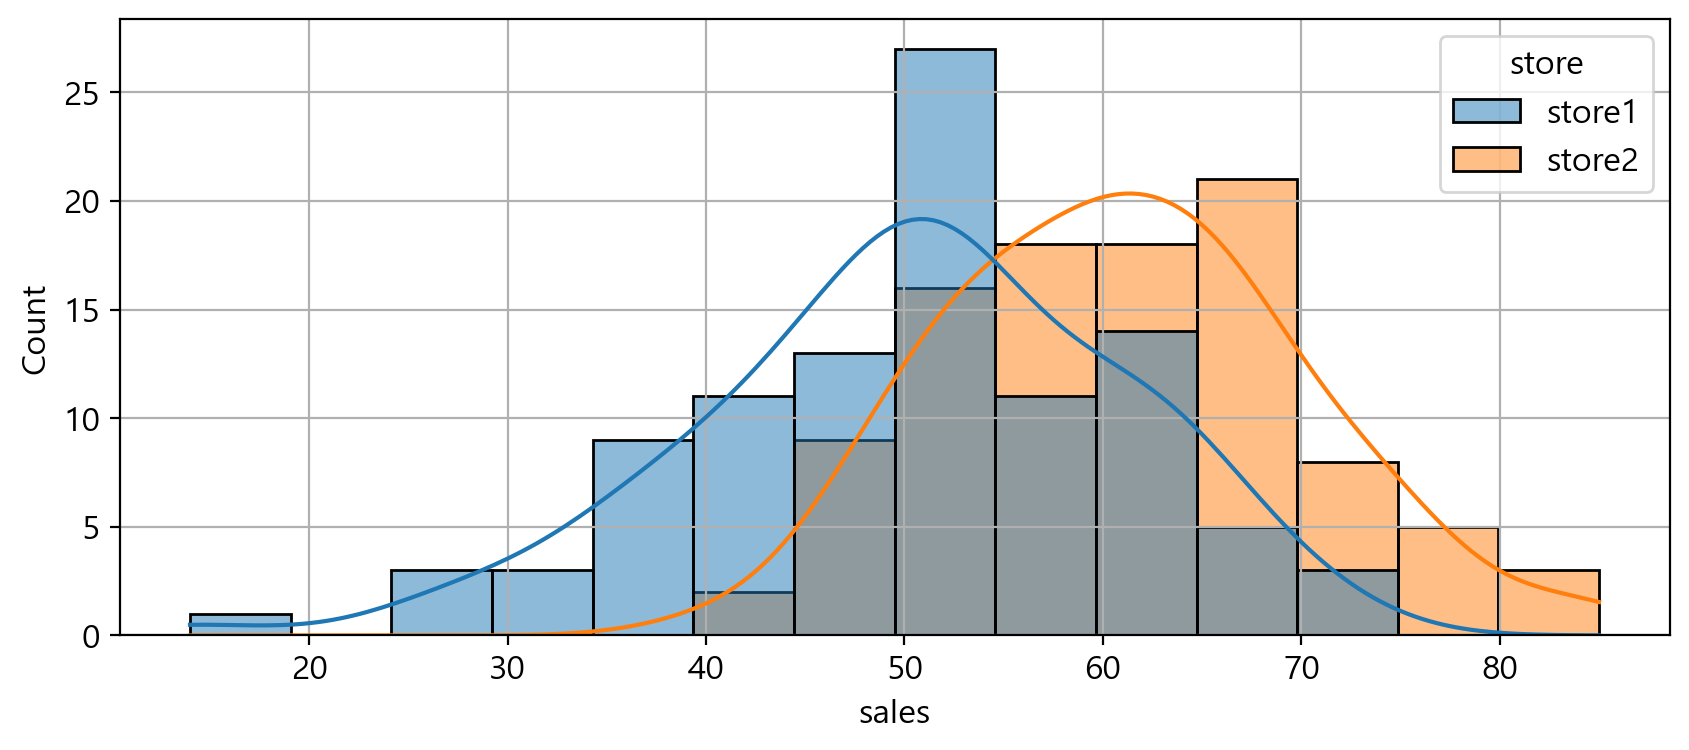

In [3]:
my_histplot(df, xname="sales", hue="store")

## #02. 데이터 정규성 확인

### [1] Shapiro Wilk 검정

In [4]:
my_normal_test(origin, method="s")

[shapiro-store1] statistic: 0.979, p-value: 0.109, 정규성 충족 여부: True
[shapiro-store2] statistic: 0.991, p-value: 0.731, 정규성 충족 여부: True


### [2] Normal Test

In [5]:
my_normal_test(origin)

[normaltest-store1] statistic: 5.651, p-value: 0.059, 정규성 충족 여부: True
[normaltest-store2] statistic: 1.174, p-value: 0.556, 정규성 충족 여부: True


## #03. 데이터 등분산성 확인

### [1] Bartlett 검정

In [6]:
my_equal_var_test(origin, normal_dist=True)

Bartlett 검정: statistic: 2.844, p-value: 0.092, 등분산성 충족 여부: True


### [2] 레빈 검정(Levene's test)

In [7]:
my_equal_var_test(origin, normal_dist=False)

Levene 검정: statistic: 1.360, p-value: 0.245, 등분산성 충족 여부: True


## #04. 정규성, 등분산성 검정 결과표 만들기

In [8]:
my_normal_equal_var_1field(df, "sales", hue="store")

+----------+-------------+-----------+----------+
| field    |   statistic |   p-value | result   |
|----------+-------------+-----------+----------|
| store1   |     5.65123 | 0.0592722 | True     |
| store2   |     1.17377 |  0.556056 | True     |
| Bartlett |     2.84392 |   0.09172 | True     |
+----------+-------------+-----------+----------+
